In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Read the dataset into a Pandas DataFrame
ICU_df = pd.read_csv('datathon4.csv')
ICU_df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [3]:
# check dimension of the dataset
print(ICU_df.shape)



(91713, 186)


In [4]:
# checking the data types
ICU_df.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object

In [5]:
# list the columns of the dataframe
print(ICU_df.columns)



Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)


In [6]:
# Display summary statistics
print(ICU_df.describe())

        encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818          0.183736    169.641588   
std       16.775119      8.275142          0.387271     10.795378   
min       16.000000     14.844926          0.000000    137.200000   
25%       52.000000     23.641975

In [7]:
# Finding the mean for relevant apache prediction variables
ICU_df['apache_4a_hospital_death_prob'].mean()


0.08678688250602871

In [8]:
ICU_df['apache_4a_icu_death_prob'].mean()

0.04395482654060119

In [9]:
ICU_df['gender'].replace({'F' : 1, 'M' : 0}, inplace=True)


In [10]:
#check 'gender' is transformed
ICU_df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,0.0,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,1.0,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,1.0,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,1.0,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,0.0,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [11]:
#dropping the 'encounter_id', 'patient_id', 'hospital_id', 'apache_4a_hospital_death_prob' and 'apached_4a_icu_death_prob' column in the ICU_df_encoded dataframe.
ICU_df = ICU_df.drop('encounter_id', axis=1)
ICU_df = ICU_df.drop('patient_id', axis=1)
ICU_df = ICU_df.drop('hospital_id', axis=1)
ICU_df = ICU_df.drop('apache_4a_hospital_death_prob', axis=1)
ICU_df = ICU_df.drop('apache_4a_icu_death_prob', axis=1)





In [12]:
ICU_df.head() #checking that they are gone

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,Caucasian,0.0,180.3,Floor,Floor,92,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.42,0,Caucasian,1.0,160.0,Floor,Floor,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.95,0,Caucasian,1.0,172.7,Emergency Department,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.64,1,Caucasian,1.0,165.1,Operating Room,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,0.0,188.0,NaN,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [13]:
#Running one_hot encoding on all other categorical columns
categorical_columns = ICU_df.select_dtypes(include='object').columns.tolist() #select all columns with 'object' data type


In [14]:
#create new dataframe with one-hot encoding for all categorical columns
ICU_df_encoded = pd.get_dummies(ICU_df, columns=categorical_columns)

ICU_df_encoded.head() #checking the head with the new hot-encoded library. Note new number of columns from 178 to 237

,hospital_death,age,bmi,elective_surgery,gender,height,icu_id,pre_icu_los_days,readmission_status,weight,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0,68.0,22.73,0,0.0,180.3,92,0.541667,0,73.9,...,1,0,0,0,0,0,0,0,0,0
1,0,77.0,27.42,0,1.0,160.0,90,0.927778,0,70.2,...,0,0,0,0,0,0,1,0,0,0
2,0,25.0,31.95,0,1.0,172.7,93,0.000694,0,95.3,...,0,0,0,1,0,0,0,0,0,0
3,0,81.0,22.64,1,1.0,165.1,92,0.000694,0,61.7,...,1,0,0,0,0,0,0,0,0,0
4,0,19.0,NaN,0,0.0,188.0,91,0.073611,0,NaN,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# list the columns of the hot encoded dataframe
print(ICU_df_encoded.columns)

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'gender', 'height',
       'icu_id', 'pre_icu_los_days', 'readmission_status', 'weight',
       ...
       'apache_2_bodysystem_Cardiovascular',
       'apache_2_bodysystem_Gastrointestinal',
       'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic',
       'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Renal/Genitourinary',
       'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma',
       'apache_2_bodysystem_Undefined Diagnoses',
       'apache_2_bodysystem_Undefined diagnoses'],
      dtype='object', length=232)


In [16]:
# checking the data types
ICU_df_encoded.dtypes

hospital_death                               int64
age                                        float64
bmi                                        float64
elective_surgery                             int64
gender                                     float64
                                            ...   
apache_2_bodysystem_Renal/Genitourinary      uint8
apache_2_bodysystem_Respiratory              uint8
apache_2_bodysystem_Trauma                   uint8
apache_2_bodysystem_Undefined Diagnoses      uint8
apache_2_bodysystem_Undefined diagnoses      uint8
Length: 232, dtype: object

In [17]:
# check missing value
print(ICU_df_encoded.isnull().sum())

hospital_death                                0
age                                        4228
bmi                                        3429
elective_surgery                              0
gender                                       25
                                           ... 
apache_2_bodysystem_Renal/Genitourinary       0
apache_2_bodysystem_Respiratory               0
apache_2_bodysystem_Trauma                    0
apache_2_bodysystem_Undefined Diagnoses       0
apache_2_bodysystem_Undefined diagnoses       0
Length: 232, dtype: int64


In [18]:
#dealing with missing values by replacing missing values in every columns with the median of that column
ICU_df_encoded.fillna(ICU_df_encoded.median(), inplace=True)

# check missing value
print(ICU_df_encoded.isnull().sum())

hospital_death                             0
age                                        0
bmi                                        0
elective_surgery                           0
gender                                     0
                                          ..
apache_2_bodysystem_Renal/Genitourinary    0
apache_2_bodysystem_Respiratory            0
apache_2_bodysystem_Trauma                 0
apache_2_bodysystem_Undefined Diagnoses    0
apache_2_bodysystem_Undefined diagnoses    0
Length: 232, dtype: int64


**Logistic Regression**

In [19]:

#creating a new dataframe for logistic regression analysis called ICU_LR which has one hot encoding, dropped column and imputation for missing numbers
ICU_LR = ICU_df_encoded.copy()

In [20]:
#checking that outcome is balanced
# Assuming 'target_column' is the name of the binary column you want to check
value_counts = ICU_LR['hospital_death'].value_counts()

# Display the counts of unique values
print(value_counts)

# Check if the data is balanced
is_balanced = abs(value_counts[0] - value_counts[1]) / len(ICU_LR['hospital_death']) < 0.2  # Adjust the threshold as needed

# Display the result
print(f"The binary column's data is balanced: {is_balanced}")

0    83798
1     7915
Name: hospital_death, dtype: int64
The binary column's data is balanced: False


In [21]:
#balancing the 'hospital_death' ie outcome with bootstrap upsampling
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = ICU_LR[ICU_LR['hospital_death'] == 0]
df_minority = ICU_LR[ICU_LR['hospital_death'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine majority class with upsampled minority class
ICU_LR_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Now 'ICU_LR_upsampled' contains the upsampled data



In [22]:
#checking for balance

# Assuming 'target_column' is the name of the binary column you want to check
value_counts = ICU_LR_upsampled['hospital_death'].value_counts()

# Display the counts of unique values
print(value_counts)

# Check if the data is balanced
is_balanced = abs(value_counts[0] - value_counts[1]) / len(ICU_LR_upsampled['hospital_death']) < 0.2  # Adjust the threshold as needed

# Display the result
print(f"The binary column's data is balanced: {is_balanced}")

0    83798
1    83798
Name: hospital_death, dtype: int64
The binary column's data is balanced: True


In [23]:
# Split the data into features and target variable
X = ICU_LR_upsampled.drop('hospital_death', axis=1)
y = ICU_LR_upsampled['hospital_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)



LogisticRegression(solver='liblinear')

In [25]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[13676  3048]
 [ 3538 13258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81     16724
           1       0.81      0.79      0.80     16796

    accuracy                           0.80     33520
   macro avg       0.80      0.80      0.80     33520
weighted avg       0.80      0.80      0.80     33520



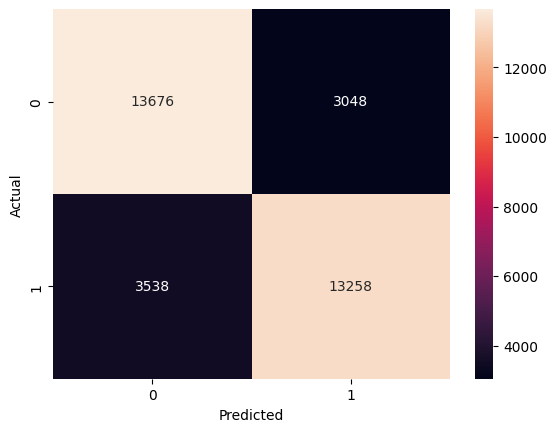

In [27]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

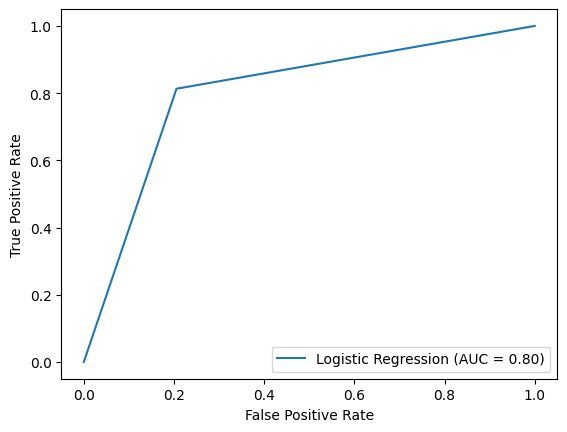

In [28]:
# Plot the ROC curve for the training set
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

**Neural Network**

In [ ]:
#creating a new dataframe for neural network analysis called ICU_NN which has one hot encoding, dropped columns and imputation for missing numbers
ICU_NN = ICU_df_encoded.copy()

In [ ]:
#balancing the 'hospital_death' ie outcome with bootstrap upsampling
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = ICU_NN[ICU_NN['hospital_death'] == 0]
df_minority = ICU_NN[ICU_NN['hospital_death'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine majority class with upsampled minority class
ICU_NN_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Now 'ICU_NN_upsampled' contains the upsampled data

In [ ]:
#checking for balance

# Assuming 'target_column' is the name of the binary column you want to check
value_counts = ICU_NN_upsampled['hospital_death'].value_counts()

# Display the counts of unique values
print(value_counts)

# Check if the data is balanced
is_balanced = abs(value_counts[0] - value_counts[1]) / len(ICU_NN_upsampled['hospital_death']) < 0.2  # Adjust the threshold as needed

# Display the result
print(f"The binary column's data is balanced: {is_balanced}")

0    83798
1    83798
Name: hospital_death, dtype: int64
The binary column's data is balanced: True


In [ ]:
print(ICU_NN_upsampled['hospital_death'].mean())


0.5


In [ ]:
# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [ ]:
#Trying method one for upsamping: Randomoverasmpler
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = ICU_NN_upsampled.drop('hospital_death', axis=1)
y = ICU_NN_upsampled['hospital_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and transform the training data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


# Check the mean of the 'hospital_death' column in both training and testing data
print(train_data['hospital_death'].mean())
print(test_data['hospital_death'].mean())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
0.4991348227452117
0.001037344398340249


In [ ]:
#Trying method two for upsamping: bootstrapping

# Randomly sample 70% of the data for training
train_data = ICU_NN_upsampled.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_data = ICU_NN_upsampled.drop(train_data.index)

# Check the mean of the 'hospital_death' column in both training and testing data
print(train_data['hospital_death'].mean())
print(test_data['hospital_death'].mean())



0.4991348227452117
0.001037344398340249


!!!! Issue with upsampling. Acknowledging that while the dataset is balanced in the outcome feature, the training and testing sets are not !!!!



In [ ]:
# Data Preparation

# Extract the 'hospital_death' column as the target variable for training and testing
Y_train = train_data['hospital_death'].to_numpy()
Y_test = test_data['hospital_death'].to_numpy()

# Extract the features (excluding 'hospital_death') for training and testing
X_train = train_data.drop('hospital_death', axis=1).to_numpy()
X_test = test_data.drop('hospital_death', axis=1).to_numpy()

# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((231, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train).type(t.float32)
Y = t.Tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 100
learning_rate = 0.01
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 20 epochs
    if epoch % 20 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Text(0, 0.5, 'loss')

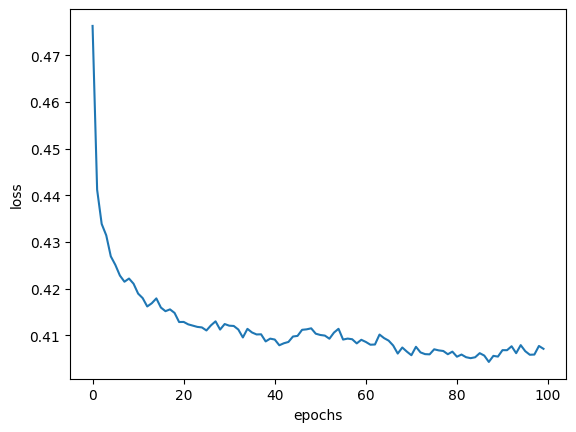

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

0.4298378825187683
0.40415138006210327


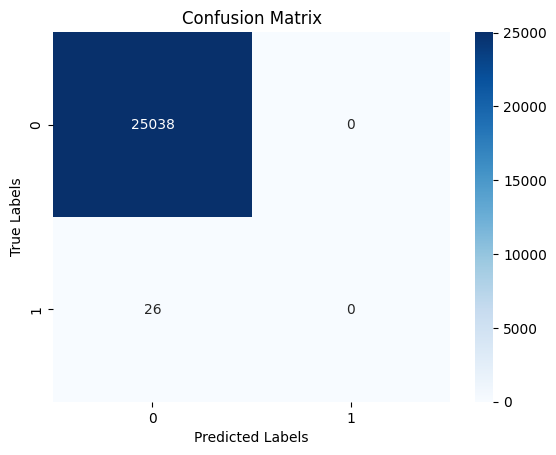

In [ ]:
#Function to plot confusion matrix
#Get Predictions and Labels:

with t.no_grad():
    X = t.Tensor(X_test).type(t.float32)
    Y = t.Tensor(Y_test).type(t.float32)
    probs_val = forward(X)
    predictions_val = probs_val.argmax(dim=1)

#create confusion matrix
    cm = confusion_matrix(Y.numpy(), predictions_val.numpy())

#plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


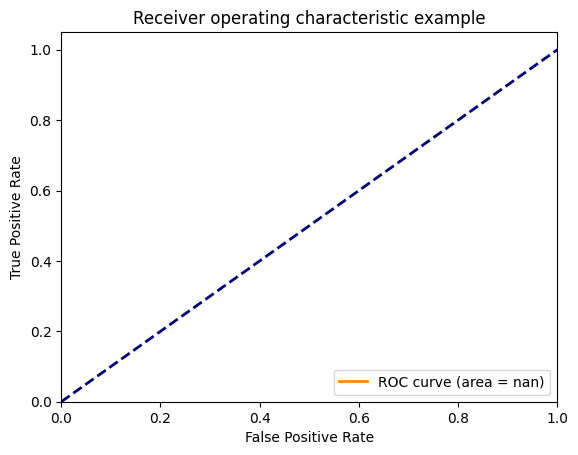

In [ ]:
# Compute ROC curve and ROC area for each class
test_y = y_test
y_pred = y_pred

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**With Regularization** Neural network

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Define hyperparameters
number_of_input_features = 231
number_of_hidden_units = 5
epochs = 100
learning_rate = 0.01
batch_size = 32
landa = 0.01  # Regularization term (lambda)

In [ ]:
# Prepare the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 20 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/100 ---> Train Accuracy: 0.7792391777038574, Validation Accuracy: 0.781200110912323
Epoch 1/100 ---> Train Accuracy: 0.7801085710525513, Validation Accuracy: 0.7926906943321228
Epoch 2/100 ---> Train Accuracy: 0.777653694152832, Validation Accuracy: 0.7705473899841309
Epoch 3/100 ---> Train Accuracy: 0.7826828360557556, Validation Accuracy: 0.7950047850608826
Epoch 4/100 ---> Train Accuracy: 0.7861520648002625, Validation Accuracy: 0.815153181552887
Epoch 5/100 ---> Train Accuracy: 0.7800915241241455, Validation Accuracy: 0.8117619156837463
Epoch 6/100 ---> Train Accuracy: 0.7807990312576294, Validation Accuracy: 0.7823970913887024
Epoch 7/100 ---> Train Accuracy: 0.7844131588935852, Validation Accuracy: 0.8166294097900391
Epoch 8/100 ---> Train Accuracy: 0.7818560004234314, Validation Accuracy: 0.8116421699523926
Epoch 9/100 ---> Train Accuracy: 0.7840125560760498, Validation Accuracy: 0.7758139371871948
Epoch 10/100 ---> Train Accuracy: 0.7800659537315369, Validation Accuracy

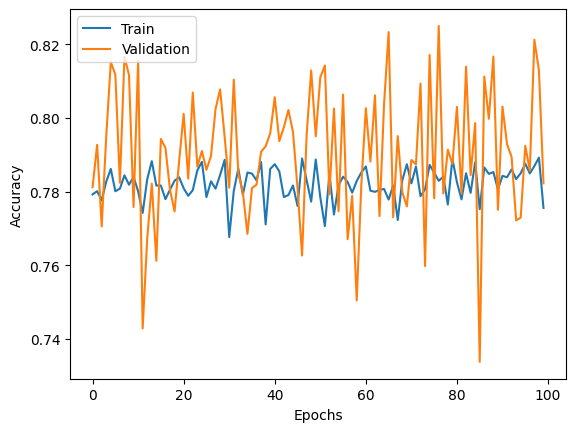

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

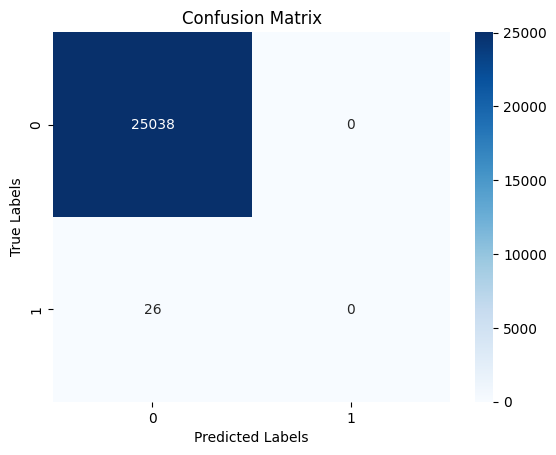

In [ ]:

#Function to plot confusion matrix
#Get Predictions and Labels:

with t.no_grad():
    X = t.Tensor(X_test).type(t.float32)
    Y = t.Tensor(Y_test).type(t.float32)
    probs_val = forward(X)
    predictions_val = probs_val.argmax(dim=1)

#create confusion matrix
    cm = confusion_matrix(Y.numpy(), predictions_val.numpy())

#plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



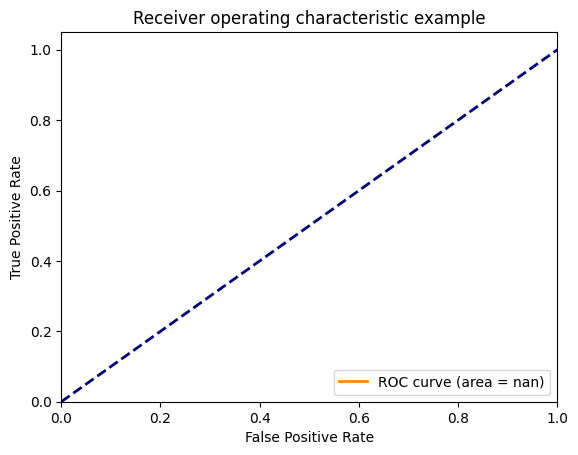

In [ ]:
# Compute ROC curve and ROC area for each class
test_y = y_test
y_pred = y_pred

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()